# Dataset: *charliehebdo*

- df.to_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-df.csv',index=False)
- src_tw_df.to_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-src.csv',index=False)

In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator
import nltk
from nltk import FreqDist, word_tokenize

In [2]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-df-2.csv', encoding = 'utf-8', header = 0)
print(df.columns)
print(df.shape)
df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date',
       'reply_tweet_id', 'reply_user_id', 'reply_tweet', 'reply_date', 'label',
       'cleaned_reply_tw', 'reply_sentiment', 'reply_emo_ro'],
      dtype='object')
(33628, 12)


,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_reply_tw,reply_sentiment,reply_emo_ro
0,552784600502915072,331658004,Charlie Hebdo became well known for publishing...,Wed Jan 07 11:11:33 +0000 2015,552785249420447745,18370911,"Now 10 dead in a shooting there today RT ""@BBC...",Wed Jan 07 11:14:08 +0000 2015,0,dead shoot today,Negative,sadness


In [3]:
src_tw_df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-src-2.csv', encoding = 'utf-8', header =0)
print(src_tw_df.columns)
print(src_tw_df.shape)
src_tw_df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date', 'label',
       'cleaned_src_tw', 'src_sentiment', 'src_emo_ro'],
      dtype='object')
(2002, 8)


,src_tweet_id,src_user_id,src_tweet,src_date,label,cleaned_src_tw,src_sentiment,src_emo_ro
0,552784600502915072,331658004,Charlie Hebdo became well known for publishing...,Wed Jan 07 11:11:33 +0000 2015,0,charlie hebdo become well know publish muhamme...,Positive,joy


In [4]:
df.isnull().sum()

src_tweet_id        0
src_user_id         0
src_tweet           0
src_date            0
reply_tweet_id      0
reply_user_id       0
reply_tweet         0
reply_date          0
label               0
cleaned_reply_tw    0
reply_sentiment     0
reply_emo_te        0
reply_emo_t5        0
reply_emo_ro        0
dtype: int64

In [ ]:
#df.loc[df.cleaned_reply_tw.isnull(),['reply_tweet','cleaned_reply_tw','reply_sentiment']]

- Delete those meaningless responses.

In [6]:
#df.dropna(inplace = True)

In [5]:
src_tw_df.isnull().sum()

src_tweet_id       0
src_user_id        0
src_tweet          0
src_date           0
label              0
cleaned_src_tw    17
src_sentiment      0
src_emo_te         0
src_emo_t5         0
src_emo_ro         0
dtype: int64

In [17]:
src_tw_df.loc[src_tw_df.cleaned_src_tw.isnull(),['src_tweet_id','src_tweet','cleaned_src_tw','src_sentiment']]

,src_tweet_id,src_tweet,cleaned_src_tw,src_sentiment
119,552807236339507200,RT #JeSuisCharlie In support of #CharlieHebdo....,NaN,Neutral
267,552820735513612288,"“If liberty means anything at all, it means th...",NaN,Neutral
328,552825402872590336,RT to fuck terrorism http://t.co/7SHjMeJ0iD ht...,NaN,Neutral
344,552826876398292992,RT this cartoon and pay your tribute\nshow the...,NaN,Neutral
377,552829395690201088,RT this cartoon and pay your tribute\nshow the...,NaN,Neutral
392,552830674357334016,"RT @froomkin: #CharlieHebdo’s Charb: ""I would ...",NaN,Neutral
686,552982828963856384,"RT @socdec: #Charb, cartoonist killed in #Pari...",NaN,Neutral
753,553113536625664000,RT @mkapral Today's French lesson. #JeSuisChar...,NaN,Neutral
765,553117623568068608,RT @Beltrew: A few of the best cartoons drawn ...,NaN,Neutral
807,553131557892804609,RT @LatuffCartoons: So now let's talk seriousl...,NaN,Neutral


In [5]:
df1 = pd.merge(df, src_tw_df[['src_tweet_id','cleaned_src_tw','src_sentiment','src_emo_ro']],\
               on='src_tweet_id')
df1.head(1)

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_reply_tw,reply_sentiment,reply_emo_ro,cleaned_src_tw,src_sentiment,src_emo_ro
0,552784600502915072,331658004,Charlie Hebdo became well known for publishing...,Wed Jan 07 11:11:33 +0000 2015,552785249420447745,18370911,"Now 10 dead in a shooting there today RT ""@BBC...",Wed Jan 07 11:14:08 +0000 2015,0,dead shoot today,Negative,sadness,charlie hebdo become well know publish muhamme...,Positive,joy


In [6]:
print("df's shape: ",df.shape)
print("df1's shape: ",df1.shape)
print("src_tw_df's shapes: ", src_tw_df.shape)

df's shape:  (33628, 12)
df1's shape:  (33628, 15)
src_tw_df's shapes:  (2002, 8)


## Sentiment Analysis

  src_sentiment reply_sentiment  count
0      Negative        Negative   8532
1      Negative         Neutral   5498
2      Negative        Positive   6101
3       Neutral        Negative   2452
4       Neutral         Neutral   2035
5       Neutral        Positive   2046
6      Positive        Negative   2586
7      Positive         Neutral   1915
8      Positive        Positive   2492


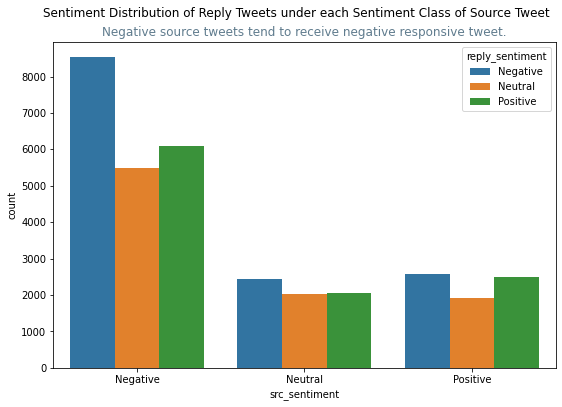

In [135]:
#which sentiment of original posts received most replys
a = pd.DataFrame(df1.groupby(['src_sentiment','reply_sentiment']).size(),columns=['count']).reset_index()
print(a)
plt.figure(figsize=(9,6))
ax = sns.barplot(x = 'src_sentiment', y='count', data = a, hue = 'reply_sentiment')
title='Sentiment Distribution of Reply Tweets under each Sentiment Class of Source Tweet' 
plt.title('Negative source tweets tend to receive negative responsive tweet.',color='#607c8e')
plt.suptitle(title, y=0.96)

plt.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/repnsrc-sentiment.pdf',dpi=300)

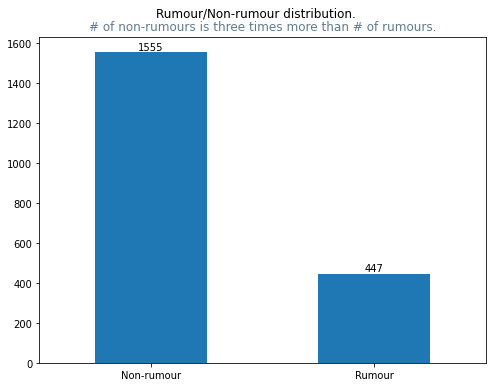

In [113]:
# rumour / non-rumour distribution

plt.figure(figsize=(8,6))
ax = src_tw_df.label.value_counts().plot.bar()
for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
ax.set_xticklabels(['Non-rumour','Rumour'])
plt.title('# of non-rumours is three times more than # of rumours.',color='#607c8e')
plt.suptitle('Rumour/Non-rumour distribution.',fontsize=12, y=0.95)
plt.xticks(rotation=0)

plt.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/label.pdf',dpi=300)

   label src_sentiment  count_src
0      0      Negative        819
1      0       Neutral        353
2      0      Positive        383
3      1      Negative        332
4      1       Neutral         88
5      1      Positive         27


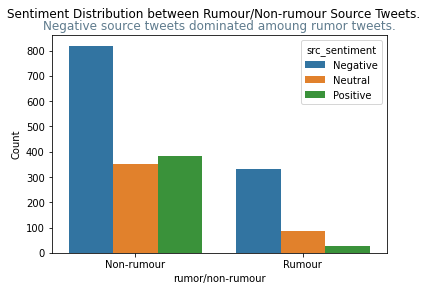

In [173]:
b = pd.DataFrame(src_tw_df.groupby(['label','src_sentiment']).size(),\
                 columns=['count_src']).reset_index()
print(b)
ax = sns.barplot(x = 'label', y='count_src', data = b, hue = 'src_sentiment')
ax.set_xticklabels(['Non-rumour','Rumour'])
plt.xlabel('rumor/non-rumour')
plt.ylabel('Count')
plt.title('Negative source tweets dominated amoung rumor tweets.',color='#607c8e')
plt.suptitle('Sentiment Distribution between Rumour/Non-rumour Source Tweets.')
plt.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/src-label-sentiment.pdf',dpi=300)

   label reply_sentiment  count_reply
0      0        Negative        10978
1      0         Neutral         7562
2      0        Positive         8903
3      1        Negative         2592
4      1         Neutral         1886
5      1        Positive         1736


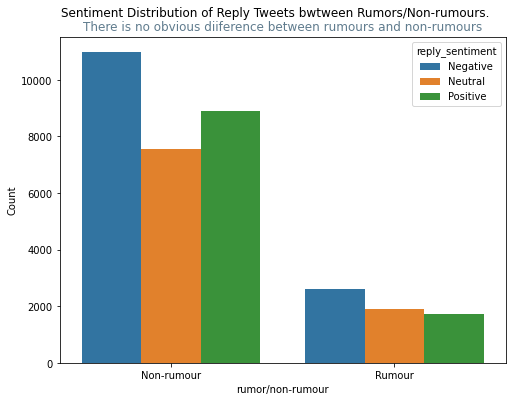

In [137]:
e = pd.DataFrame(df1.groupby(['label','reply_sentiment']).size(),\
                 columns=['count_reply']).reset_index()
print(e)
plt.figure(figsize=(8,6))
ax = sns.barplot(x = 'label', y='count_reply', data =e, hue = 'reply_sentiment')
ax.set_xticklabels(['Non-rumour','Rumour'])
plt.xlabel('rumor/non-rumour')
plt.ylabel('Count')
plt.suptitle('Sentiment Distribution of Reply Tweets bwtween Rumors/Non-rumours.',y=0.95)
plt.title('There is no obvious diiference between rumours and non-rumours',color='#607c8e')
plt.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/rep-label-sentiment.pdf',dpi=300)

## Keyword Extraction

### Source Tweet Analysis

In [24]:
src_sen = src_tw_df.cleaned_src_tw.astype(str).apply(word_tokenize)
src_tw_list = []
for sen in src_sen:
    for token in sen:
        src_tw_list.append(token)

src_tw_doc = " ".join(src_tw_list)

In [25]:
print ("There are {} words in all the source tweets.".format(len(src_tw_list)))

There are 19124 words in all the source tweets.


In [26]:
def n_unique(list1):
    list_set = set(list1)
    unique_list = (list(list_set))
    n = len(unique_list)
    return (n,unique_list)
print ("There are {} unique words in all the source tweets."\
       .format(n_unique(src_tw_list)[0]))

There are 3400 unique words in all the source tweets.


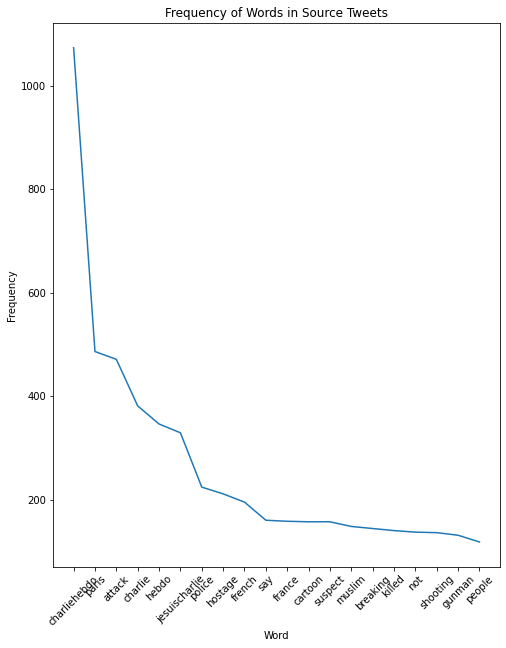

,Word,Frequency
0,charliehebdo,1073
1,paris,486
2,attack,471
3,charlie,381
4,hebdo,346
5,jesuischarlie,329
6,police,224
7,hostage,211
8,french,195
9,say,160


In [27]:
freq = FreqDist(src_tw_list)
c = pd.DataFrame(freq.items(),columns = ['Word','Frequency'])\
    .sort_values('Frequency',ascending=False)
c.reset_index(inplace=True,drop=True)

fig = plt.figure(figsize = (8,10))
sns.lineplot(data=c.head(20),x='Word',y='Frequency')   
plt.xticks(rotation=45)
plt.title('Frequency of Words in Source Tweets')
plt.show()    
# fig.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/freqDist.pdf',dpi=300)
c.head(20)

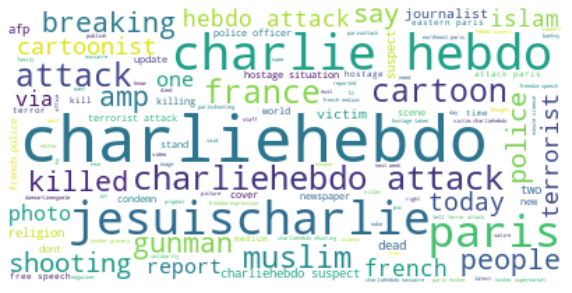

In [156]:
plt.figure(figsize=(10,10))
mywordcloud = WordCloud(background_color='white').generate(src_tw_doc)
plt.imshow(mywordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
# mywordcloud.to_file('D:/論文/PHEME9/Code/graph/charliehebdo/src-wordcloud_src.pdf')

### Reply Tweet Analysis

In [48]:
rep_sen = df.cleaned_reply_tw.apply(word_tokenize)
rep_list = []
for sen in rep_sen:
    for token in sen:
        rep_list.append(token)

rep_doc = " ".join(rep_list)

In [49]:
print ("There are {} words in all the reply tweets.".format(len(rep_list)))
print ("There are {} unique words in all the reply tweets."\
       .format(n_unique(rep_list)[0]))

There are 237959 words in all the reply tweets.
There are 29097 unique words in all the reply tweets.


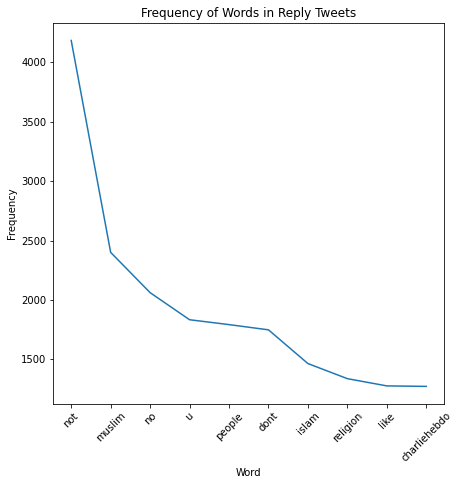

,Word,Frequency
0,not,4185
1,muslim,2401
2,no,2062
3,u,1834
4,people,1793
5,dont,1749
6,islam,1465
7,religion,1338
8,like,1277
9,charliehebdo,1273


In [158]:
freq = FreqDist(rep_list)
d = pd.DataFrame(freq.items(),columns = ['Word','Frequency'])\
    .sort_values('Frequency',ascending=False)
d.reset_index(inplace=True,drop=True)

fig = plt.figure(figsize = (7,7))
sns.lineplot(data=d.head(10),x='Word',y='Frequency')   
plt.xticks(rotation=45)
plt.title('Frequency of Words in Reply Tweets')
plt.show()    
# fig.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/rep-freqDist.pdf',dpi=300)
d.head(10)

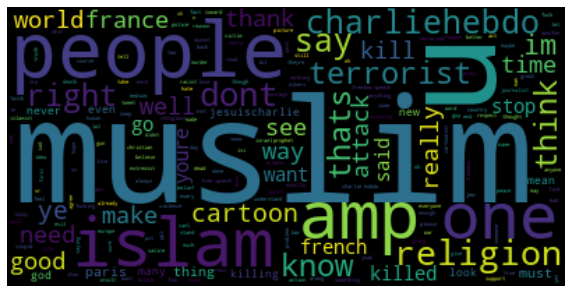

In [162]:
plt.figure(figsize=(10,10))
mywordcloud = WordCloud().generate(rep_doc)
plt.imshow(mywordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
mywordcloud.to_file('D:/論文/PHEME9/Code/graph/charliehebdo/rep-wordcloud.pdf')

## Emotion analysis

### Source Tweet Analysis

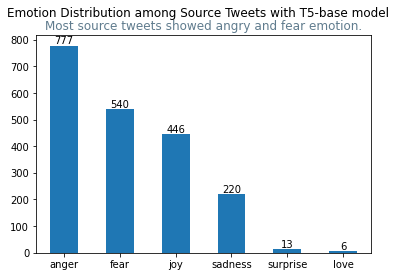

In [63]:
# Emotion analysis on source tweet (T5-based)
ax = src_tw_df.src_emo_t5.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.title('Most source tweets showed angry and fear emotion.',color='#607c8e')
plt.suptitle('Emotion Distribution among Source Tweets with T5-base model')
plt.xticks(rotation=0)
plt.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/src-emo-t5.pdf',dpi=300)

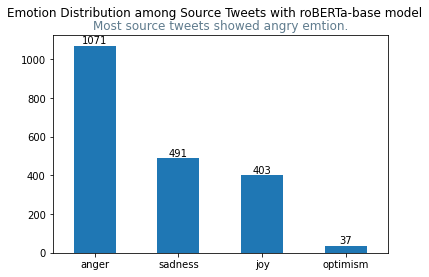

In [70]:
# Emotion analysis on source tweet (roBERT-based)
ax = src_tw_df.src_emo_ro.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.title('Most source tweets showed angry emtion.',color='#607c8e')
plt.suptitle('Emotion Distribution among Source Tweets with roBERTa-base model')
plt.xticks(rotation=0)
plt.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/src-emo-ro.pdf',dpi=300)

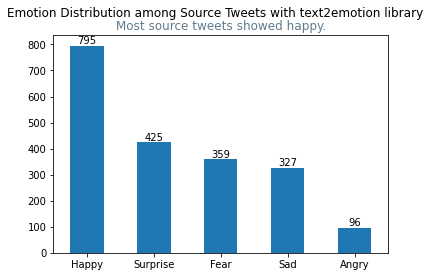

In [65]:
# Emotion analysis on source tweet (Text2emotion)
ax = src_tw_df.src_emo_te.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.title('Most source tweets showed happy.',color='#607c8e')
plt.suptitle('Emotion Distribution among Source Tweets with text2emotion library')
plt.xticks(rotation=0)
plt.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/src-emo-te.pdf',dpi=300)

### Reply Tweet Analysis

In [ ]:
df1.reply_emo_t5.value_counts()

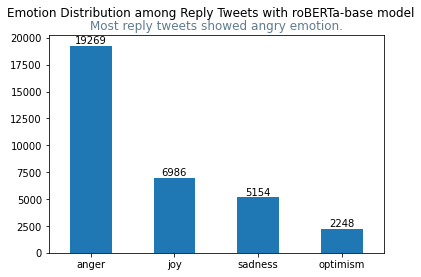

<Figure size 432x288 with 0 Axes>

In [76]:
# Reply sentiment analysis
ax = df1.reply_emo_ro.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.xticks(rotation=0)
plt.title('Most reply tweets showed angry emotion.',color='#607c8e')
plt.suptitle('Emotion Distribution among Reply Tweets with roBERTa-base model')
plt.show()
plt.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/rep-emo-ro.pdf',dpi=300)

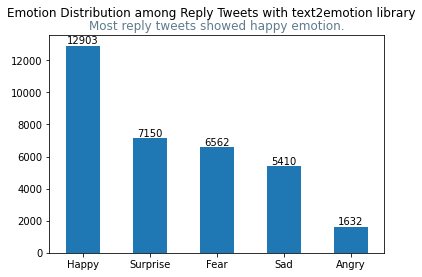

<Figure size 432x288 with 0 Axes>

In [74]:
# Reply sentiment analysis
ax = df1.reply_emo_te.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.xticks(rotation=0)
plt.title('Most reply tweets showed happy emotion.',color='#607c8e')
plt.suptitle('Emotion Distribution among Reply Tweets with text2emotion library')
plt.show()
plt.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/rep-emo-te.pdf',dpi=300)

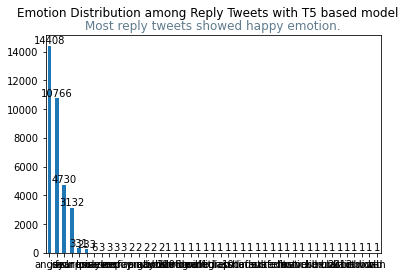

In [144]:
# Reply sentiment analysis
ax = df1.reply_emo_t5.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.xticks(rotation=0)
plt.title('Most reply tweets showed happy emotion.',color='#607c8e')
plt.suptitle('Emotion Distribution among Reply Tweets with T5 based model')
plt.show()
# plt.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/rep-emo-t5.pdf',dpi=300)

   src_emo_ro reply_emo_ro  count
0       anger        anger  12610
1       anger          joy   3634
2     sadness        anger   3285
3       anger      sadness   3032
4         joy        anger   3008
5         joy          joy   1705
6     sadness          joy   1473
7       anger     optimism   1411
8     sadness      sadness   1257
9         joy      sadness    774
10        joy     optimism    391
11    sadness     optimism    369
12   optimism        anger    366
13   optimism          joy    174
14   optimism      sadness     91
15   optimism     optimism     77


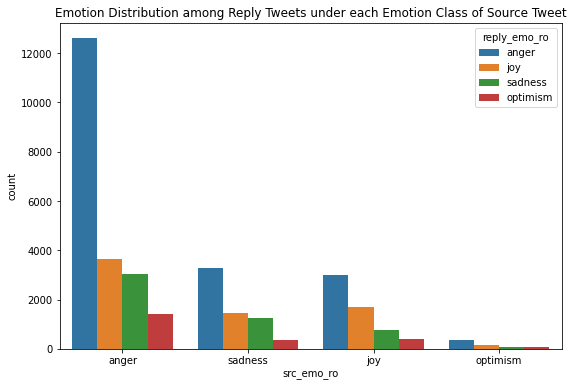

In [147]:
#which emotion of original posts received most replys
f = pd.DataFrame(df1.groupby(['src_emo_ro','reply_emo_ro']).size(),columns=['count']).\
                                sort_values('count',ascending=False).reset_index()
print(f)
plt.figure(figsize=(9,6))
ax = sns.barplot(x = 'src_emo_ro', y='count', data = f, hue = 'reply_emo_ro')
title='Emotion Distribution of Reply Tweets under each Emotion Class of Source Tweet' 
ax.set_title(title, loc='center', wrap=True, y=1)

plt.savefig('D:/論文/PHEME9/Code/graph/charliehebdo/repnsrc-emotion.pdf',dpi=300)

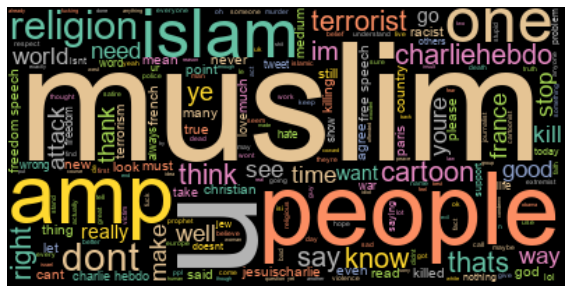

In [85]:
'''
Non-rumor tweets (what did reply tweets respond to non-rumor tweets???)
-> religion ; say ; know
'''
text = " ".join(i for i in df1.loc[df1.label ==0]['cleaned_reply_tw'])
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color="black", font_path='arial',colormap='Set2').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

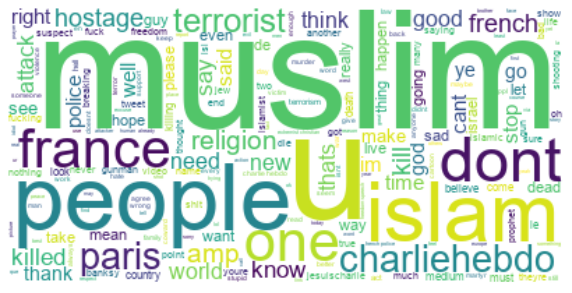

In [152]:
'''
What did reply tweets respond to rumour tweet??
-> auxiliary verb: dont ; 
-> none: hostage ; terroist ; france ; paris ; 
-> verb: kill 
'''
text = " ".join(i for i in df1.loc[df1.label ==1]['cleaned_reply_tw'])
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color="white", font_path='arial').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [165]:
temp_df = df1.copy()
temp_df['day'] = pd.DatetimeIndex(temp_df['reply_date']).day

<AxesSubplot:xlabel='day', ylabel='count'>

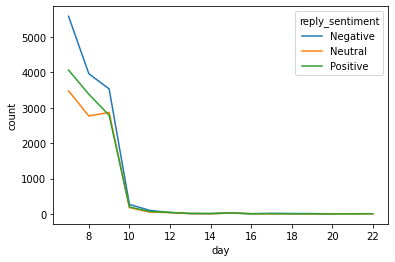

In [170]:
t = pd.DataFrame(temp_df.groupby(['day','reply_sentiment']).size(),columns=['count'])
sns.lineplot(data=t,x='day',y='count',hue = 'reply_sentiment')

In [172]:
pd.DatetimeIndex(temp_df['reply_date']).time
# t = pd.DataFrame(temp_df.loc[temp_df.day.isin([7,8])].groupby(['day','reply_sentiment']).size(),columns=['count'])
# sns.lineplot(data=t,x='day',y='count',hue = 'reply_sentiment')

array([datetime.time(11, 14, 8), datetime.time(11, 20, 8),
       datetime.time(11, 20, 18), ..., datetime.time(16, 54, 22),
       datetime.time(17, 4, 54), datetime.time(17, 25, 32)], dtype=object)